<a href="https://colab.research.google.com/github/Cs-Student/Deep_Learning_Pytorch/blob/main/building_a_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[:5][:2]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888]])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "Label" : y})
circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.Label.value_counts()

Label
1    500
0    500
Name: count, dtype: int64

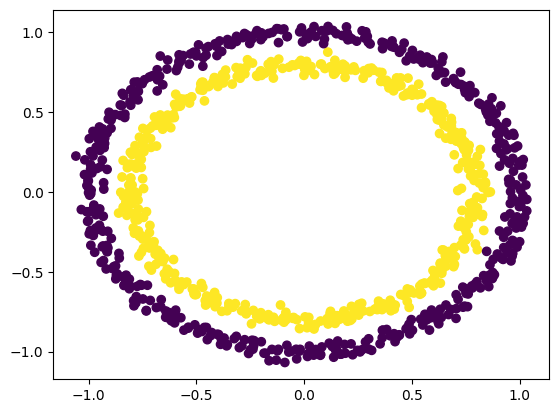

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y)


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch
from torch import nn
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=3,out_features=1)
  def forward(self, x):
    return self.layer_2(self.layer1(x))

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png', width = 400, height = 300)

In [ ]:
model_0 = CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
#if we are using sequential flow, we can also use inbuilt sequential module
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

A regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, and the same applies to the Adam optimizer (torch.optim.Adam()).



In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} : Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 : Loss: 0.70765, Accuracy: 50.00% | Test loss: 0.69973, Test acc: 50.00%
Epoch: 100 : Loss: 0.69428, Accuracy: 49.00% | Test loss: 0.69134, Test acc: 54.50%
Epoch: 200 : Loss: 0.69367, Accuracy: 49.50% | Test loss: 0.69203, Test acc: 52.50%
Epoch: 300 : Loss: 0.69337, Accuracy: 49.12% | Test loss: 0.69258, Test acc: 52.00%
Epoch: 400 : Loss: 0.69321, Accuracy: 49.88% | Test loss: 0.69301, Test acc: 47.50%
Epoch: 500 : Loss: 0.69312, Accuracy: 49.12% | Test loss: 0.69336, Test acc: 50.50%
Epoch: 600 : Loss: 0.69306, Accuracy: 50.25% | Test loss: 0.69365, Test acc: 48.50%
Epoch: 700 : Loss: 0.69303, Accuracy: 50.75% | Test loss: 0.69387, Test acc: 46.50%
Epoch: 800 : Loss: 0.69301, Accuracy: 51.00% | Test loss: 0.69406, Test acc: 48.00%
Epoch: 900 : Loss: 0.69300, Accuracy: 50.88% | Test loss: 0.69420, Test acc: 47.00%


In [ ]:
 #it is performing poorly, lets visualize
import requests
from pathlib import Path

if not Path("helper_functions_1.py").is_file():
  print("download helper_functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  file = open("helper_functions_1.py","wb")
  print(len(request.content))
  file.write(request.content)



In [ ]:
from helper_functions_1 import plot_predictions, plot_decision_boundary

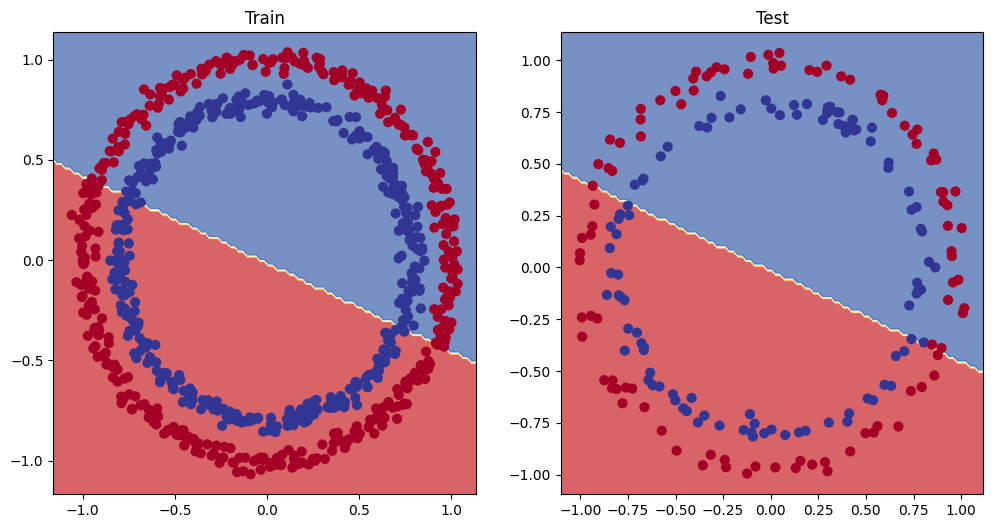

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [ ]:
model_1 = CircleModelV1()
print(model_1)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} : Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 : Loss: 0.69314, Accuracy: 49.88% | Test loss: 0.69323, Test acc: 50.50%
Epoch: 100 : Loss: 0.69153, Accuracy: 52.50% | Test loss: 0.69198, Test acc: 48.00%
Epoch: 200 : Loss: 0.68986, Accuracy: 56.00% | Test loss: 0.69044, Test acc: 54.00%
Epoch: 300 : Loss: 0.68744, Accuracy: 64.12% | Test loss: 0.68814, Test acc: 64.00%
Epoch: 400 : Loss: 0.68409, Accuracy: 67.75% | Test loss: 0.68500, Test acc: 68.50%
Epoch: 500 : Loss: 0.67896, Accuracy: 64.50% | Test loss: 0.68040, Test acc: 63.50%
Epoch: 600 : Loss: 0.67078, Accuracy: 67.50% | Test loss: 0.67391, Test acc: 60.00%
Epoch: 700 : Loss: 0.65775, Accuracy: 72.00% | Test loss: 0.66457, Test acc: 67.50%
Epoch: 800 : Loss: 0.63692, Accuracy: 75.88% | Test loss: 0.64900, Test acc: 71.50%
Epoch: 900 : Loss: 0.60196, Accuracy: 81.25% | Test loss: 0.62062, Test acc: 77.00%


In [ ]:
#remove one hidden layer

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_2(self.relu(self.layer_1(x)))

In [ ]:
model_2 = CircleModelV2()
print(model_2)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} : Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 100 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 200 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 300 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 400 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 500 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 600 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 700 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 800 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%
Epoch: 900 : Loss: 0.69711, Accuracy: 53.00% | Test loss: 0.69745, Test acc: 54.50%


In [ ]:
#doesn't work, added layers but with few less neurons

In [ ]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=5)
    self.layer_3 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV3()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} : Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 : Loss: 0.59986, Accuracy: 74.75% | Test loss: 0.59467, Test acc: 80.50%
Epoch: 100 : Loss: 0.52866, Accuracy: 85.50% | Test loss: 0.53347, Test acc: 84.50%
Epoch: 200 : Loss: 0.44489, Accuracy: 87.50% | Test loss: 0.45389, Test acc: 85.50%
Epoch: 300 : Loss: 0.40696, Accuracy: 79.75% | Test loss: 0.46936, Test acc: 79.00%
Epoch: 400 : Loss: 0.41325, Accuracy: 76.00% | Test loss: 0.45846, Test acc: 77.00%
Epoch: 500 : Loss: 0.41957, Accuracy: 75.50% | Test loss: 0.47369, Test acc: 74.50%
Epoch: 600 : Loss: 0.40504, Accuracy: 75.88% | Test loss: 0.47410, Test acc: 73.00%
Epoch: 700 : Loss: 0.36678, Accuracy: 78.88% | Test loss: 0.44959, Test acc: 74.50%
Epoch: 800 : Loss: 0.20886, Accuracy: 93.62% | Test loss: 0.27164, Test acc: 89.50%
Epoch: 900 : Loss: 0.12220, Accuracy: 98.25% | Test loss: 0.16099, Test acc: 95.50%


In [ ]:
#yeah it worked

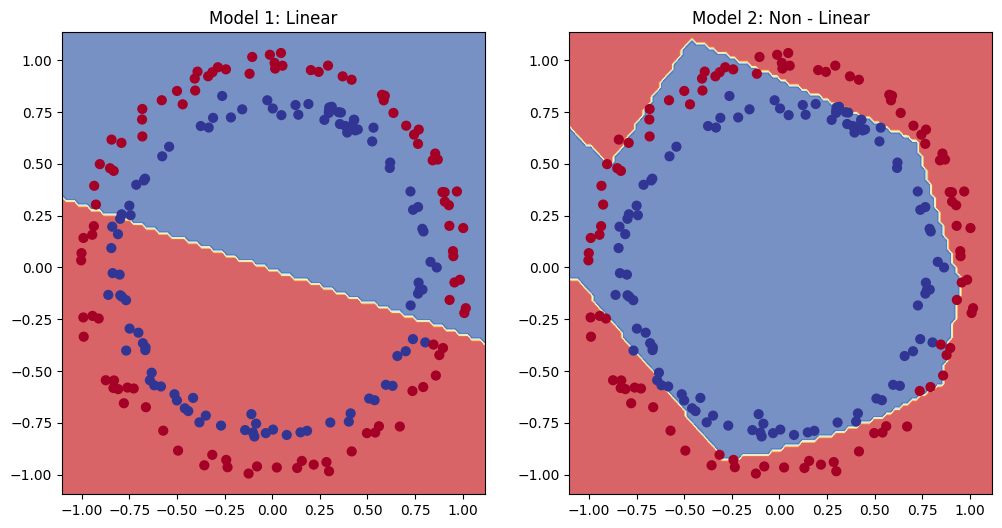

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 1: Linear")
plot_decision_boundary(model_0, X_test, y_test) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Model 2: Non - Linear")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
#for visualisation
https://playground.tensorflow.org/

SyntaxError: invalid syntax (<ipython-input-1-49735266017b>, line 1)